## Generate subpanel Figure 1c

In [1]:
## import statement

import matplotlib
from matplotlib import pyplot as plt
import seaborn
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import umap
import scanpy as sc
import random
import os

# tissuemosaic import
import tissuemosaic as tp

In [2]:
from tissuemosaic.utils import *
from tissuemosaic.plots import *
from tissuemosaic.models.patch_analyzer import SpatialAutocorrelation, Composition
from tissuemosaic.data.dataset import MetadataCropperDataset

In [3]:
## set seeds
r_seed=t_seed=n_seed=100

random.seed(r_seed)
torch.manual_seed(t_seed)
np.random.seed(n_seed)



In [4]:
## Make plots directory if it doesn't already exist
try:
    os.mkdir("./plots")
except:
    pass

In [5]:
## plotting parameters

linewidth = 5
tickfontsize = 80
labelfontsize = 80
labelpad = 40
titlefontsize=80
legendfontsize=80

In [6]:
## load in dino and vae features
import pickle
all_features_dict = pickle.load(open(os.path.abspath("../pkls/Figure1/testis_all_features_dict_umap_dino_vae.pickle"), 'rb'))


In [7]:
## Compute cosine similarity of patch NCVs and plot against cosine similarity of patch representations for DINO 

ncv_key = "dino_patch_ncv"
rep_key = "dino"

dino_slopes = []

all_sim_n_dino = []
all_sim_n_ncv_dino = []
for ref_point_idx in np.arange(0,6000,50):
    
    # calculate dino similarity
    ref_z_dino = all_features_dict[rep_key][ref_point_idx]
    
    dist_type = 'cosine'

    if dist_type == 'euclidean':
        dist_n_dino = np.linalg.norm(all_features_dict[rep_key] - ref_z_dino[None, :], axis=-1)
        sim_n_dino = np.exp(-dist_n_dino / (2.0 * np.std(dist_n_dino)))
    elif dist_type == 'cosine':
        sim_n_dino = np.sum(all_features_dict[rep_key] * ref_z_dino[None, :], -1) / (np.linalg.norm(all_features_dict[rep_key], axis=-1) * np.linalg.norm(ref_z_dino))
        sim_n_dino = np.clip(sim_n_dino, a_min=0., a_max=1.) 
        sim_n_dino[np.where(np.isnan(sim_n_dino))[0]] = 0

    # calculate ncv similarity
    
    ref_z = all_features_dict[ncv_key][ref_point_idx]
    
    if dist_type == 'euclidean':
        dist_n_ncv = np.linalg.norm(all_features_dict[ncv_key] - ref_z[None, :], axis=-1)
        sim_n_ncv = np.exp(-dist_n_ncv / (2.0 * np.std(dist_n_ncv)))
    elif dist_type == 'cosine':
        sim_n_ncv = np.sum(all_features_dict[ncv_key] * ref_z[None, :], -1) / (np.linalg.norm(all_features_dict[ncv_key], axis=-1) * np.linalg.norm(ref_z))
        sim_n_ncv = np.clip(sim_n_ncv, a_min=0., a_max=1.) 
        sim_n_ncv[np.where(np.isnan(sim_n_ncv))[0]] = 0


    
    # Calculate the best fit line
    slope, intercept = np.polyfit(sim_n_dino, sim_n_ncv, 1)

    dino_slopes.append(slope)
    all_sim_n_dino.append(sim_n_dino)
    all_sim_n_ncv_dino.append(sim_n_ncv)

all_sim_n_dino = np.concatenate(all_sim_n_dino, axis=0)
all_sim_n_ncv_dino = np.concatenate(all_sim_n_ncv_dino, axis=0)

In [8]:
## Compute cosine similarity of patch NCVs and plot against cosine similarity of patch representations for VAE 

ncv_key = "vae_patch_ncv"
rep_key = "vae"

vae_slopes = []

all_sim_n_vae = []
all_sim_n_ncv_vae = []
for ref_point_idx in np.arange(0,6000,50):
    
    # calculate vae similarity
    ref_z_vae = all_features_dict[rep_key][ref_point_idx]
    
    dist_type = 'cosine'

    if dist_type == 'euclidean':
        dist_n_vae = np.linalg.norm(all_features_dict[rep_key] - ref_z_vae[None, :], axis=-1)
        sim_n_vae = np.exp(-dist_n_vae / (2.0 * np.std(dist_n_vae)))
    elif dist_type == 'cosine':
        sim_n_vae = np.sum(all_features_dict[rep_key] * ref_z_vae[None, :], -1) / (np.linalg.norm(all_features_dict[rep_key], axis=-1) * np.linalg.norm(ref_z_vae))
        sim_n_vae = np.clip(sim_n_vae, a_min=0., a_max=1.) 
        sim_n_vae[np.where(np.isnan(sim_n_vae))[0]] = 0

    # calculate ncv similarity
    
    ref_z = all_features_dict[ncv_key][ref_point_idx]
    
    if dist_type == 'euclidean':
        dist_n_ncv = np.linalg.norm(all_features_dict[ncv_key] - ref_z[None, :], axis=-1)
        sim_n_ncv = np.exp(-dist_n_ncv / (2.0 * np.std(dist_n_ncv)))
    elif dist_type == 'cosine':
        sim_n_ncv = np.sum(all_features_dict[ncv_key] * ref_z[None, :], -1) / (np.linalg.norm(all_features_dict[ncv_key], axis=-1) * np.linalg.norm(ref_z))
        sim_n_ncv = np.clip(sim_n_ncv, a_min=0., a_max=1.) 
        sim_n_ncv[np.where(np.isnan(sim_n_ncv))[0]] = 0

    all_sim_n_vae.append(sim_n_vae)
    all_sim_n_ncv_vae.append(sim_n_ncv)
    
     # Calculate the best fit line
    slope, intercept = np.polyfit(sim_n_vae, sim_n_ncv, 1)
    
    vae_slopes.append(slope)

all_sim_n_vae = np.concatenate(all_sim_n_vae, axis=0)
all_sim_n_ncv_vae = np.concatenate(all_sim_n_ncv_vae, axis=0)

In [9]:
## Compute cosine similarity of patch NCVs and plot against cosine similarity of patch representations for STAGATE

## Load in stagate results and calculate NCV

stagate_results_dir = os.path.abspath("../benchmarking/stagate/stagate_results_testis")

from tissuemosaic.data import AnndataFolderDM
from tissuemosaic.models.ssl_models import *

# Make a list of all the h5ad files in the annotated_anndata_dest_folder
fname_list = []
for f in os.listdir(stagate_results_dir):
    if f.endswith('.h5ad'):
        fname_list.append(f)

anndata_list = []

## dummy dm to create sparse images
model = tp.models.ssl_models.Dino.load_from_checkpoint(checkpoint_path=os.path.abspath("../model_checkpoints/testis/testis_dino.pt"), strict=False)
dm = tp.data.AnndataFolderDM(**model._hparams) 

for i in range(len(fname_list)):
        
        fname = fname_list[i]
        
        # open adata and convert to sparse_image
        adata_path = os.path.join(stagate_results_dir, fname)
        adata = read_h5ad(adata_path)
        
        sp_img = dm.anndata_to_sparseimage(adata)
        
        #compute ncv with different k
        for k in [100]:
            ncv = sp_img.compute_ncv(feature_name="ncv_k{}".format(k), k=k)
            
        anndata_list.append(sp_img.to_anndata())

all_stagate_reps = []
all_ncv_k100_reps = []

for anndata in anndata_list:
    all_stagate_reps.append(anndata.obsm['STAGATE'])
    all_ncv_k100_reps.append(anndata.obsm['ncv_k100'])
    
test_features_dict = {}
test_features_dict['stagate'] = np.concatenate(all_stagate_reps, axis=0)
test_features_dict['ncv_k100_reps'] = np.concatenate(all_ncv_k100_reps, axis=0)

random_inds = (np.random.rand(3000) * 187422).astype(int)

test_features_dict_sample = {}

for key in test_features_dict.keys():
    test_features_dict_sample[key] = test_features_dict[key][random_inds]

rep_key = 'stagate'
ncv_key = 'ncv_k100_reps'

list_of_sim_n_stagate_ncv = []
list_of_sim_n_stagate = []

stagate_slopes = []
for ref_point_idx in np.arange(0,3000,50):


    # print(ref_point_idx)
    
    # calculate stagate similarity
    ref_z_rep = test_features_dict_sample[rep_key][ref_point_idx]
    
    dist_type = 'cosine'

    if dist_type == 'euclidean':
        dist_n_rep = np.linalg.norm(test_features_dict_sample[rep_key] - ref_z_rep[None, :], axis=-1)
        sim_n_rep = np.exp(-dist_n_rep / (2.0 * np.std(dist_n_rep)))
    elif dist_type == 'cosine':
        sim_n_rep = np.sum(test_features_dict_sample[rep_key] * ref_z_rep[None, :], -1) / (np.linalg.norm(test_features_dict_sample[rep_key], axis=-1) * np.linalg.norm(ref_z_rep))
        sim_n_rep = np.clip(sim_n_rep, a_min=0., a_max=1.) 
        sim_n_rep[np.where(np.isnan(sim_n_rep))[0]] = 0

    # calculate ncv similarity
    
    ref_z = test_features_dict[ncv_key][ref_point_idx]
    
    if dist_type == 'euclidean':
        dist_n = np.linalg.norm(test_features_dict_sample[ncv_key] - ref_z[None, :], axis=-1)
        sim_n = np.exp(-dist_n / (2.0 * np.std(dist_n)))
    elif dist_type == 'cosine':
        sim_n = np.sum(test_features_dict_sample[ncv_key] * ref_z[None, :], -1) / (np.linalg.norm(test_features_dict_sample[ncv_key], axis=-1) * np.linalg.norm(ref_z))
        sim_n = np.clip(sim_n, a_min=0., a_max=1.) 
        sim_n[np.where(np.isnan(sim_n))[0]] = 0

    list_of_sim_n_stagate_ncv.append(sim_n)
    list_of_sim_n_stagate.append(sim_n_rep)
    
     # Calculate the best fit line
    slope, intercept = np.polyfit(sim_n_vae, sim_n_ncv, 1)
    stagate_slopes.append(slope)
    

all_sim_n_stagate = np.concatenate(list_of_sim_n_stagate, axis=0)
all_sim_n_ncv_stagate = np.concatenate(list_of_sim_n_stagate_ncv, axis=0)


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/skambha6/miniforge3/en

number of elements ---> 30132
mean and median spacing 16.353857684013548, 15.931447916615909
The dense shape of the image is -> torch.Size([9, 1180, 1180])
number of elements ---> 34868
mean and median spacing 15.821949004591055, 15.638433550603624
The dense shape of the image is -> torch.Size([9, 1180, 1181])
number of elements ---> 27840
mean and median spacing 16.009033744023068, 15.768961335552781
The dense shape of the image is -> torch.Size([9, 1160, 1143])
number of elements ---> 29178
mean and median spacing 15.90507495709278, 15.497339152935078
The dense shape of the image is -> torch.Size([9, 1178, 1175])
number of elements ---> 35797
mean and median spacing 15.760547246990356, 15.570735462452099
The dense shape of the image is -> torch.Size([9, 1179, 1180])
number of elements ---> 29607
mean and median spacing 15.810478612949094, 15.727658385209352
The dense shape of the image is -> torch.Size([9, 1180, 855])


In [11]:
import seaborn as sns
colors = sns.color_palette("deep", 10).as_hex()

vae:
[[1.         0.26959633]
 [0.26959633 1.        ]]


/tmp/ipykernel_717251/1811412407.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_data = data.groupby('Representation Bin')['Neighborhood Cosine Similarity'].median().reset_index()


stagate:
[[ 1.         -0.00621068]
 [-0.00621068  1.        ]]
dino:
[[1.         0.44349433]
 [0.44349433 1.        ]]


/tmp/ipykernel_717251/1811412407.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_data = data.groupby('Representation Bin')['Neighborhood Cosine Similarity'].median().reset_index()
/tmp/ipykernel_717251/1811412407.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_data = data.groupby('Representation Bin')['Neighborhood Cosine Similarity'].median().reset_index()


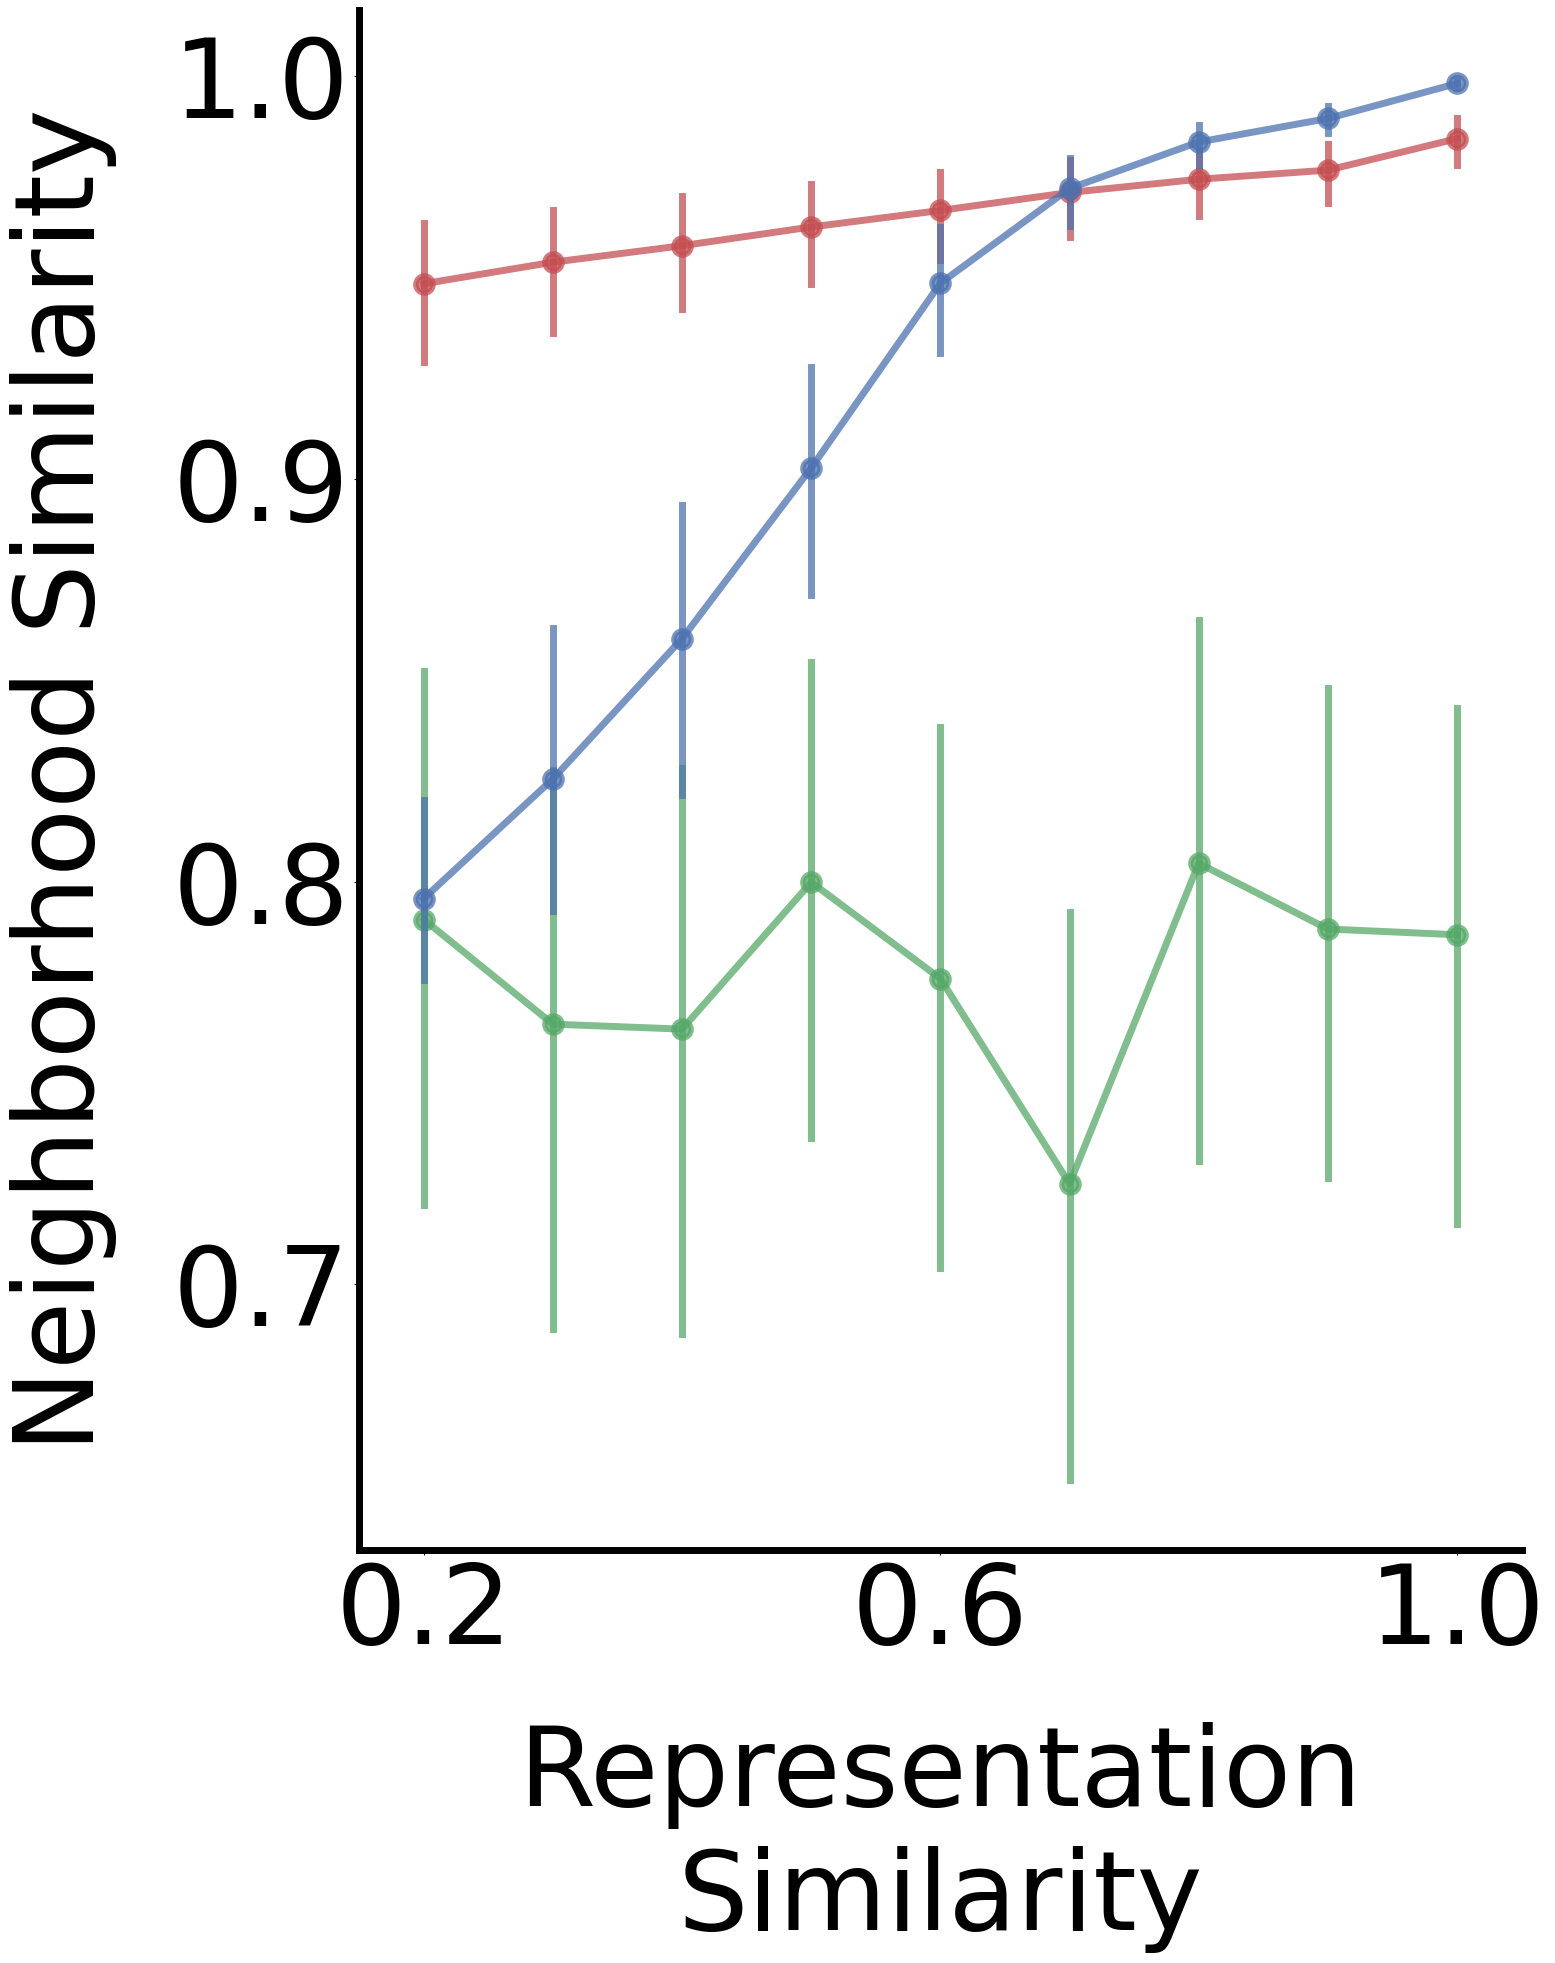

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,20))


errorbar = 'pi'
pi = 20
# VAE: Create a dataframe with the representation and neighborhood cosine similarity
data = pd.DataFrame({'Representation': all_sim_n_vae, 'Neighborhood Cosine Similarity': all_sim_n_ncv_vae})

print("vae:")
print(np.corrcoef(all_sim_n_vae, all_sim_n_ncv_vae))
# Calculate the median neighborhood cosine similarity within each bin
data['Representation Bin'] = pd.cut(data['Representation'], bins=np.arange(0.1,1.1,step=0.1))
median_data = data.groupby('Representation Bin')['Neighborhood Cosine Similarity'].median().reset_index()

# Plot the median neighborhood cosine similarity

median_data['Representation Bin'] = median_data['Representation Bin'].astype(str)

sns.pointplot(x='Representation Bin', y='Neighborhood Cosine Similarity', data=data, errorbar=(errorbar, pi), estimator=np.median,  linewidth=linewidth, alpha=0.75, color=colors[3])
# STAGATE: Create a dataframe with the representation and neighborhood cosine similarity

# Create a dataframe with the representation and neighborhood cosine similarity
data = pd.DataFrame({'Representation': all_sim_n_stagate, 'Neighborhood Cosine Similarity': all_sim_n_ncv_stagate})

print("stagate:")
print(np.corrcoef(all_sim_n_stagate, all_sim_n_ncv_stagate))
# Calculate the median neighborhood cosine similarity within each bin
data['Representation Bin'] = pd.cut(data['Representation'], bins=np.arange(0.1,1.1,step=0.1))
median_data = data.groupby('Representation Bin')['Neighborhood Cosine Similarity'].median().reset_index()

# Plot the median neighborhood cosine similarity

median_data['Representation Bin'] = median_data['Representation Bin'].astype(str)

sns.pointplot(x='Representation Bin', y='Neighborhood Cosine Similarity', data=data, errorbar=(errorbar, pi), estimator=np.median, linewidth=linewidth, alpha=0.75, color=colors[2])

# DINO: Create a dataframe with the representation and neighborhood cosine similarity
data = pd.DataFrame({'Representation': all_sim_n_dino, 'Neighborhood Cosine Similarity': all_sim_n_ncv_dino})

print("dino:")
print(np.corrcoef(all_sim_n_dino, all_sim_n_ncv_dino))
# Calculate the median neighborhood cosine similarity within each bin

data['Representation Bin'] = pd.cut(data['Representation'], bins=np.arange(0.1,1.1,step=0.1))
median_data = data.groupby('Representation Bin')['Neighborhood Cosine Similarity'].median().reset_index()

sns.pointplot(x='Representation Bin', y='Neighborhood Cosine Similarity', data=data, errorbar=(errorbar, pi), estimator=np.median,  linewidth=linewidth, alpha=0.75, color=colors[0])


# plt.legend(fontsize=labelfontsize)

ax.set_xlabel('Representation\nSimilarity', fontsize=labelfontsize, labelpad=labelpad)
ax.set_ylabel('Neighborhood Similarity', fontsize=labelfontsize, labelpad = labelpad)
labels = np.arange(0.2,1.1,step=0.4)
rounded_labels = [round(label,1) for label in labels]
ax.set_xticks(ticks=np.arange(len(labels))*4, labels=rounded_labels, fontsize=tickfontsize)
ax.tick_params(axis='y', labelsize=tickfontsize)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(['TissueMosaic', 'VAE', 'STAGATE'], fontsize=labelfontsize, loc='upper left')
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
fig.savefig('./plots/fig_1c.pdf', transparent=True, bbox_inches='tight',dpi=600)


